In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('water.csv')

In [4]:
data_north = data[data['location'] == 'North']
data_south = data[data['location'] == 'South']

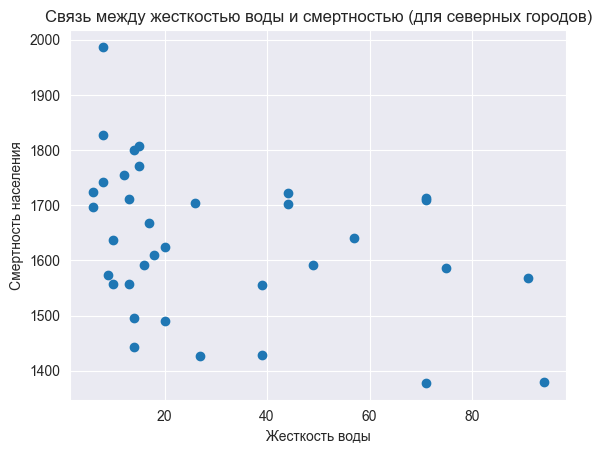

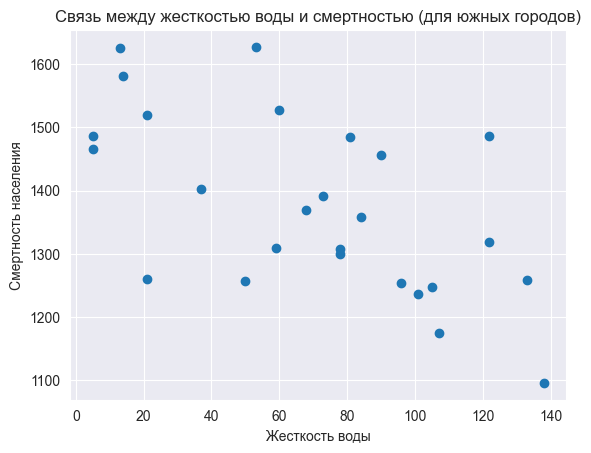

In [21]:
plt.scatter(data_north['hardness'], data_north['mortality'])
plt.title('Связь между жесткостью воды и смертностью (для северных городов)')
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность населения')
plt.show()

plt.scatter(data_south['hardness'], data_south['mortality'])
plt.title('Связь между жесткостью воды и смертностью (для южных городов)')
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность населения')
plt.show()

In [11]:
from scipy.stats import pearsonr, spearmanr

In [12]:
pearson_corr, _ = pearsonr(data_north['hardness'], data_north['mortality'])
print(f'Коэффициент корреляции Пирсона (для северных городов): {pearson_corr}')

pearson_corr, _ = pearsonr(data_south['hardness'], data_south['mortality'])
print(f'Коэффициент корреляции Пирсона (для южных городов): {pearson_corr}')

Коэффициент корреляции Пирсона (для северных городов): -0.36859783832887183
Коэффициент корреляции Пирсона (для южных городов): -0.6021532715484159


In [13]:
spearman_corr, _ = spearmanr(data_north['hardness'], data_north['mortality'])
print(f'Коэффициент корреляции Спирмена (для северных городов): {spearman_corr}')

spearman_corr, _ = spearmanr(data_south['hardness'], data_south['mortality'])
print(f'Коэффициент корреляции Спирмена (для южных городов): {spearman_corr}')

Коэффициент корреляции Спирмена (для северных городов): -0.4042078956511175
Коэффициент корреляции Спирмена (для южных городов): -0.5957229185013566


In [14]:
from sklearn.linear_model import LinearRegression

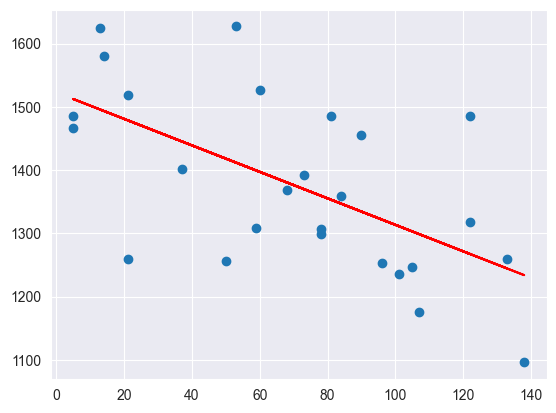

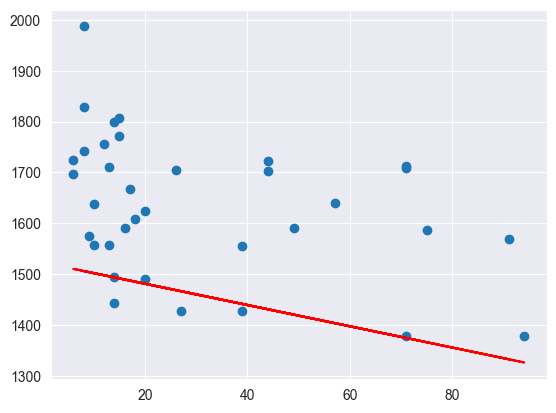

In [16]:
X_s = data_south['hardness'].values.reshape(-1,1)
y_s = data_south['mortality'].values
X_n = data_north['hardness'].values.reshape(-1,1)
y_n = data_north['mortality'].values

model_s = LinearRegression()
model_s.fit(X_s, y_s)

plt.scatter(X_s, y_s)
plt.plot(X_s, model_s.predict(X_s), color='red')
plt.show()

model_n = LinearRegression()
model_n.fit(X_n, y_n)

plt.scatter(X_n, y_n)
plt.plot(X_n, model_s.predict(X_n), color='red')
plt.show()

In [17]:
r_sq_s = model_s.score(X_s, y_s)
print(f'Коэффициент детерминации (для южных городов): {r_sq_s}')

r_sq_n = model_n.score(X_n, y_n)
print(f'Коэффициент детерминации (для северных городов): {r_sq_n}')

Коэффициент детерминации (для южных городов): 0.3625885624364601
Коэффициент детерминации (для северных городов): 0.1358643664207173


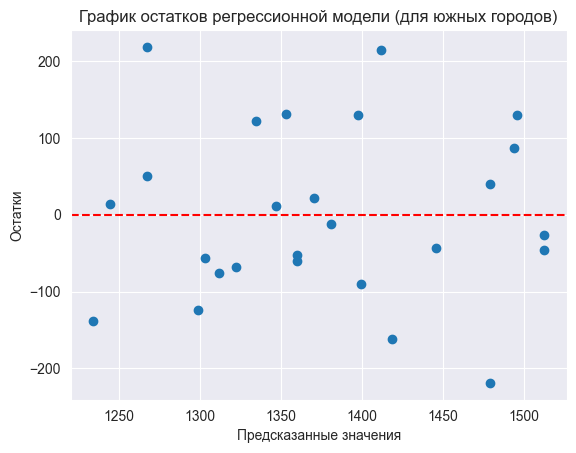

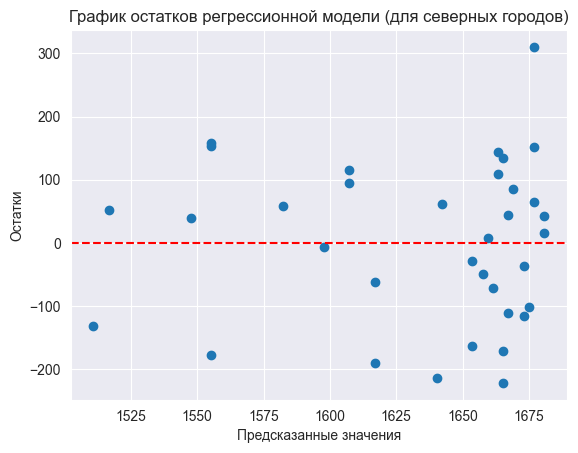

In [20]:
residuals_s = y_s - model_s.predict(X_s)

plt.scatter(model_s.predict(X_s), residuals_s)
plt.title('График остатков регрессионной модели (для южных городов)')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

residuals_n = y_n - model_n.predict(X_n)

plt.scatter(model_n.predict(X_n), residuals_n)
plt.title('График остатков регрессионной модели (для северных городов)')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()